In [1]:
words = open('names.txt','r').read().splitlines() # convert txt file to list of strings

In [ ]:
words[:10] # prints first 10 words in our list of strings

In [ ]:
longest = max(len(w) for w in words) # longest word

In [ ]:
print([w for w in words if len(w) == longest])

### We will first build a bigram model (predicts next character after first character)
• Focus is on two characters at a time

In [ ]:
# print bigrams for first word ('emma')

for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>'] # start and end token
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1,ch2)

#### To learn the statistics about which characters are likely to follow other characters, we will count how often combinations of two characters occur in our dataset.

Use dictionaries


In [ ]:
b = {} # init a dictionary

for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # start and end token
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2) # a bigram is a tuple of characters
        b[bigram] = b.get(bigram,0)+1 # count bigram occurence
        #print(ch1,ch2)

In [ ]:
# returns tuples of key-value pairs, sorted by frequency

sorted(b.items(), key=lambda kv: -kv[1])

#### Use 2-D arrays (using PyTorch) to represent frequency of key-value pairs (bigrams) more efficiently than using Python dictionaries (as done above)

In [2]:
import torch

In [3]:
# initialize a 2D array of zeros with 28 rows and cols called N
# we use 28 because there are 26 letters in alpha and 2 special characters
N = torch.zeros((28,28), dtype=torch.int32)

### create lookup table from strings to ints (so we can represent our dataset in a 2D Pytorch array)

In [12]:
chars = sorted(list(set(''.join(words))))

stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [15]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # start and end token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] # map char to int
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1 # += 1 since we start at 0

### To visualize this 2D array in a more readable way, use matplotlib

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.imshow(N)

### To visualize the array better invert the lookup using an itos (integer to string) conversion

* remember in this case our strings are chars of the alphabet including two special characters

In [20]:
itos = {i:s for s,i in stoi.items()}

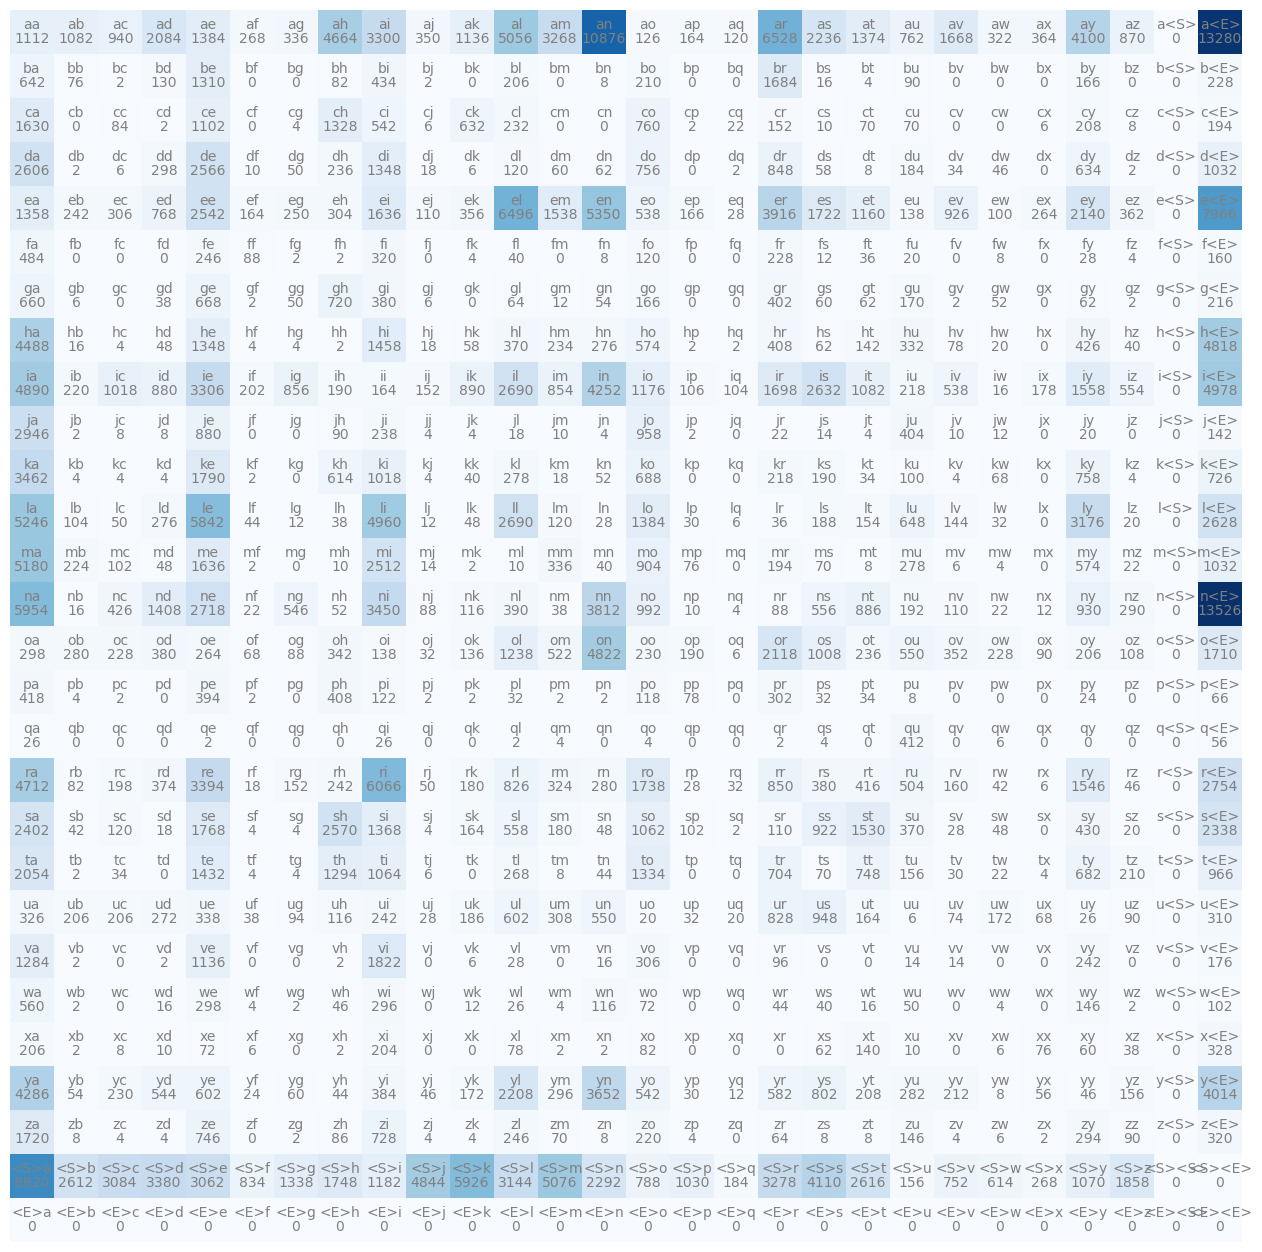

In [21]:
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center", va="bottom", color='gray')
        plt.text(j,i,N[i,j].item(), ha="center",va="top",color='gray')
plt.axis('off');